In [1]:
# Run this to make sure graphics are called according to the current directory structure.
#  This makes it easy to deploy the labs with unbroken images by changing only this cell

import os

cwd = os.getcwd()
components = cwd.split('/')[:-4]  # split the string into its components using the '/' delimiter
components.append('graphics')
graphics_path = "/".join(components)  # join the components back together using the '/' delimiter
# print(graphics_path)

<h1 style="color:#D30982;text-align:center;vertical-align:middle;">Overview of Combinatorial Optimization
    <br></h1>

<h1 style="color:#D30982;">Overview</h1>

- Overview
- Examples: Knapsack problem, Traveling Salesman problem, Max Cut problem
- Solving Max Cut with exhaustive search
- Quadratic Optimization, special case: quadratic unconstrained binary optimization (QUBO)

<h1 style="color:#D30982;">Some Combinatorial Optimization Problems</h1>

What does combinatorial mean?

- Combinatorics is the study of discrete objects, such as finite sets or arrangements, and how they can be combined or arranged in different ways. 

For example, how many ways can you choose two books from a shelf of three books?

Possible combinations: (1,2), (1,3), (2,3)

What about if choosing two books from shelf of five books?

Possible combinations: (1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (2,5), (3,4), (3,5), (4,5)

In general, combinatorics seeks to frame questions like this in a more generic fashion and give concrete solutions. The number of ways someone can choose n objects from a set of k objects is given via the binomial coefficient ${n \choose k} = \frac{n!}{k!(n-k)!}$.

You can check that ${3 \choose 2}=3$ and ${5 \choose 2}=10$



What is a combinatorial optimization problem?

- To be a combinatorial optimization problem, we need a structure like we had before along with the some notion of 'best' answer. 

- Example - Max Cut Problem: Given a graph (set of nodes and edges) how can we make a full cut through the graph so that the maximal number of initially connected nodes are cut?

- Example - The Knapsack Problem: We are given a knapsack that can contain a limited number of objects $N$ and a set of items that each have a weight $W_i$ and value $V_i$.  How can we select a subset of the items to place in the knapsack, such that the total weight of the selected items does not exceed the capacity of the knapsack, and the total value of the selected items is maximized?

(* Make some graphics to go along with this *)

<h1 style="color:#9A11DA;">Max Cut</h1>

To get a better understanding how combinatorial optimization, let's go through the Max Cut problem in a bit more detail.

Max Cut is a graph problem where we want to optimize the number of edges cut when we segment the graph.

In general, a graph (G) is a set of edges (E) and vertices (V). We might simply say G=(V,E) to denote some graph.

Here is an example of a graph with 8 vertices and randomly joined edges:

<img src="../graphics/rotating_graph_3d.gif" height="450" width="450" style="margin-left:auto;margin-right:auto;">

First off, what is a cut?

- A cut is a partitioning of the vertices into two sets. We can call one set S and the other T or red vs blue or etc.
- You can run the cell below (shift + enter) to generate a random cut for the graph.

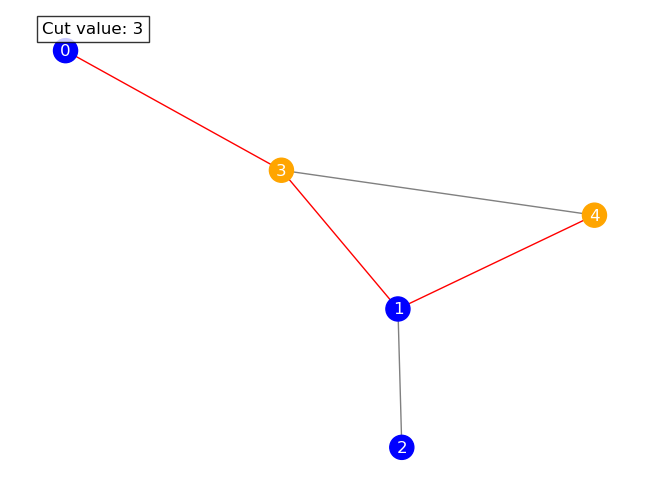

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a random graph
num_nodes = 5
edge_probability = 0.5
graph = nx.random_graphs.erdos_renyi_graph(num_nodes, edge_probability)

# Choose an arbitrary cut
cut_nodes = set(np.random.choice(num_nodes, size=num_nodes//2, replace=False))

# Define a function to check if an edge is in the cut
def is_cut_edge(edge, cut_nodes):
    return (edge[0] in cut_nodes) != (edge[1] in cut_nodes)

# Calculate the cut value
cut_value = sum(1 for edge in graph.edges() if is_cut_edge(edge, cut_nodes))

# Draw the graph
pos = nx.spring_layout(graph)
node_colors = ['orange' if node in cut_nodes else 'blue' for node in graph.nodes]
edge_colors = ['red' if is_cut_edge(edge, cut_nodes) else 'gray' for edge in graph.edges()]

nx.draw(graph, pos, node_color=node_colors, edge_color=edge_colors, with_labels=True, font_color='white')

# Add the cut value as a text annotation
plt.text(0.05, 0.95, f'Cut value: {cut_value}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In the code above, we have segmented the graph into blue and yellow vertices. The red edges denote ones that are cut by this partitioning and grey are ones that are not cut.

Let's formulate the value of a cut more mathematically...

- Give the blue vertices a value +1 and the yellow vertices a value of -1.
- Then we can consider two nodes labeled by $i$ and $j$ whose values are $x_i$ and $x_j$.
- Convince yourself that $x_i x_j=1$ if the vertices are connected and $x_i x_j=-1$ if they are cut.

We can write a function that gives 0 when two vertices are disconnected and 1 when they are connected using the previous mapping.

The function will be $\frac{1-x_i x_j}{2}=\begin{cases} 
      0 &, \quad \text{cut} \\
      1 &, \quad \text{connected}
   \end{cases}$

Now, the total value of a cut can be written as

$$ C(G) = \sum_{i,j\in E}\frac{1-x_i x_j}{2}$$

and the Max Cut problem can be formulated as

$$ \text{Max Cut} = \text{max} \sum_{i,j\in E}\frac{1-x_i x_j}{2}\;.$$


Note that we could generalize this problem by allowing weights on both the edges ($w_{ij}$) and the vertices ($v_i$).

Also, to be clear, there are two ways of looking at this Max Cut problem.

- Decision Problem: "Given a graph G and an integer $k$, determine whether there is a cut of at least $k$ in G"
    - Has a yes/no answer that is definite. Not approximated!
- Optimization Problem: "Given a graph G, find a maximum cut"
    - Is not a yes/no answer.
    - This is typically what is meant when people say Max Cut problem.

As a decision problem, Max Cut is called NP-complete. NP-complete problems are a special class of these puzzles that have a few common characteristics.

- Verifying a solution: Given a proposed solution to one of these puzzles, it's relatively easy and quick to check if the solution is correct or not.

- No known efficient classical algorithms: However, finding the optimal solution to these puzzles can be very challenging and time-consuming using traditional computers, especially as the problem size grows. There isn't any known algorithm that can consistently solve these problems quickly for large instances.

- Interconnectedness: Interestingly, if you can find an efficient way to solve one of these NP-complete problems, you can apply that technique to solve all other NP-complete problems as well. They are interconnected in a way that solving one efficiently implies an efficient solution for all of them.

As an optimization problem, Max Cut is called NP-hard. NP-hard problems are considered at least as difficult as the hardest problems in the set NP, which is a set of problem where given a solution, it's relatively easy and quick to check if it's correct or not.

- 'hard' highlights that these problems are challenging and time-consuming using traditional computers as the problem size grows

- NP-hard problems are not restricted to the easy-to-verify solutions requirement of NP problems. So, unlike NP-complete problems, they might not even have the property of quickly verifying a solution.

We will focus on the optimization problem, and just call it Max Cut from now on.

Again, for an NP-hard problem, there is no known algorithm which guarantees an optimal solution quickly (polynomial time). The answer is only guaranteed to be found using a brute-force search through all the possible answers.

Let's actually show how we can solve the Max Cut problem via brute-force so we get a feel for how quickly finding a solution gets out of control. To make things easy on ourselves, let's use a small graph.

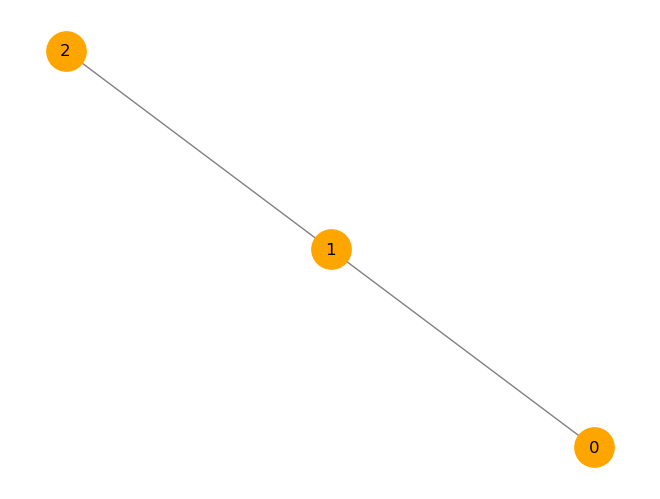

In [3]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(3))
G.add_edge(0,1)
G.add_edge(1,2)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='orange', edge_color='gray', node_size=800)


How many different possible states do we need to search?

List them all as bit strings:

- '000'
- '001'
- '010'
- '100'
- '011'
- '101'
- '110'
- '111'

Eight ways in total, but note that '000' and '111' don't actually make sense if we need to make a cut. 

See that generally the number of possible states is 2 raised to the power of the number of vertices. So for 3 vertices, we have $2*2*2=2^3=8$

So for $N$ vertices, we need to search through $2^N -2$ states which is just the same as $2^N$ for large problems. This tells us finding the exact solution to Max Cut is exponentially difficult.

In the code cell below, we have written an implementation of a brute-force search for Max Cut. 

Go ahead and run the below cell for a small graph and increase the graph size to see how the time to solve changes. What do you expect should happen given the previous calculations?

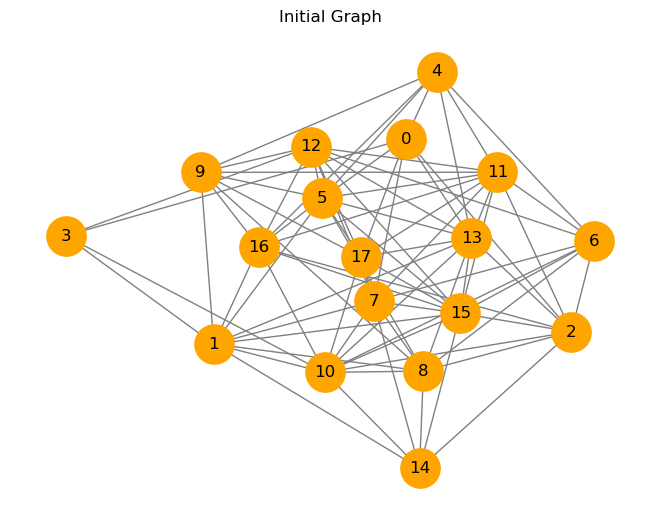

Time taken to solve the Max-Cut problem: 2.324372 seconds


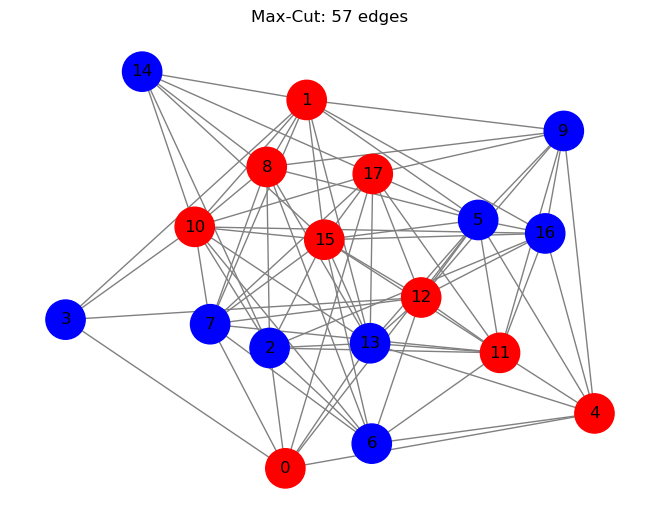

In [4]:
### Solving the Max-Cut Problem with exhaustive search

# Step 1: Import the required libraries
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
import time

# Step 2: Generate a small random graph
def generate_random_graph(num_nodes, edge_probability):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(i, j)
    
    return G

num_nodes = 18
edge_probability = 0.5
graph = generate_random_graph(num_nodes, edge_probability)

# Step 3: Plot the initial graph
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='orange', edge_color='gray', node_size=800)
    plt.title("Initial Graph")
    plt.show()

plot_graph(graph)

# Step 4: Define a function to calculate the cut size
def cut_size(graph, cut):
    size = 0
    for edge in graph.edges:
        if cut[edge[0]] != cut[edge[1]]:
            size += 1
    return size

# Step 5: Solve the Max-Cut problem using exhaustive search
def max_cut(graph):
    max_cut_size = 0
    max_cut_partition = None

    for partition in itertools.product([0, 1], repeat=num_nodes):
        current_cut_size = cut_size(graph, partition)
        if current_cut_size > max_cut_size:
            max_cut_size = current_cut_size
            max_cut_partition = partition

    return max_cut_partition, max_cut_size

start_time = time.time()
cut_partition, cut_value = max_cut(graph)
elapsed_time = time.time() - start_time
print(f"Time taken to solve the Max-Cut problem: {elapsed_time:.6f} seconds")

# Step 6: Plot the graph with the Max-Cut solution
def plot_graph_with_cut(graph, cut_partition):
    pos = nx.spring_layout(graph)
    colors = ['red' if cut_partition[node] == 0 else 'blue' for node in graph.nodes]
    
    nx.draw(graph, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=800)
    plt.title(f"Max-Cut: {cut_value} edges")
    plt.show()

plot_graph_with_cut(graph, cut_partition)


We will come back to how we can address Max Cut via other methods shortly...

<h1 style="color:#D30982;">Quadratic Optimization and QUBO's</h1>

What is quadratic optimization?
 - Quadratic optimization is a specific type of optimization process involving quadratic functions. 
 - Involve minimizing a quadratic objective function subject to linear constraints.
 - Also called quadratic programming




  <h2 style="color:#9A11DA;"> Formal Statement of Quadratic Optimization </h2>

 Variables: 
 - $c \in \mathbb{R}^n$, 
 
 - $Q \in \mathbb{R}^n \times \mathbb{R}^n, Q=Q^T$

 - $A \in \mathbb{R}^m \times \mathbb{R}^n$

 - $b\in \mathbb{R}^m$

 Cost function:
 - $\frac{1}{2}x^TQx+c^Tx$

 Constraints:
 - $A x \leq b$

  <h2 style="color:#9A11DA;"> Linear Least Squares Regression Problem - Example of Quadratic Optimization</h2>

  - Everyone has likely had to think about how to fit a linear function to data.

  - In physics, a common experiment is to measure the force caused by a stretching a spring some distance $\Delta x$.

  - A simplistic model for the force generated by a spring, as a function of displacement, is $F=-k\Delta x$. So, fitting a line to force $F$ vs. displacement $\Delta x$ gives us an estimate of the spring constant $k$.

  (* Insert actual Python example of fitting some example data to a line here *)
  

Let's show that the linear least squares problem you just solved can be framed as a quadratic programming problem:

- Fitting data to a line is a simple example of linear least square regression.

- In general, linear Least Squares Regression seeks to fit data with a function generally of the form $y_i=\sum_{j} X_{ij} \beta_j = \beta_0 +\beta_1 x_1 +\beta_2 x_2 + ...$

- The quadratic cost function is then $||y^{(data)}_{i} - \sum_{j} X_{ij} \beta_j||^2$ and to match previous notation we assume $\mathbf{y}\equiv y^{(data)}_{i}$, $X_{ij}\equiv \mathbf{X} $, and $\beta_j \equiv \mathbf{\beta}$ so that the cost function appears as $||\mathbf{y}-\mathbf{X} \mathbf{\beta}||^2$.

$$||\mathbf{y}-\mathbf{X} \mathbf{\beta}||^2 = (\mathbf{y}-\mathbf{X} \mathbf{\beta})^{T}(\mathbf{y}-\mathbf{X} \mathbf{\beta})\\
= ... $$

  <h2 style="color:#D30982;"> QUBO's</h2>

- Stands for Quadratic Unconstraints Binary Optimization.

- QUBO's are a subclass of quadratic optimization.

- Get from QO to QUBO by removing all constraints and reducing the vector $x$ to only take binary values $(0,1)$.

- The set of binary values is finite so QUBO's are a type of combinatorial optimization problem

  <h2 style="color:#9A11DA;"> Max Cut QUBO Mapping</h2>

  - Coming back to Max Cut, we previously said that Max Cut is a type of combinatorial optimization problem.

  - It turns out that Max Cut can be framed as a QUBO problem. Let's see how.


A QUBO is a problem setup where we have binary variables $x_i$ and a cost function $C(x) = x^T Q x + c^T x$, where $Q$ is symmetric $Q=Q^T$.

To start framing Max Cut as QUBO, let's change variables so that our vertices, which were previously either -1 or +1, are binary variables $x_i\in (0,1)$.

Doing so, our cut function changes form slightly so that the Max Cut problem with binary variables is written as

$$ \text{Max Cut} = \text{max} \sum_{i,j\in E}x_i(1-x_j)$$

and, as we mentioned before, we may have edge weights $w_{ij}$ and/or vertex weights $v_i$ so that

$$ \text{Generalized Max Cut} = \text{max} \sum_{i,j \in E}w_{ij}x_i(1-x_j)+\sum_{i\in V}v_i x_i \, .$$

We can turn the maximization into a minimization by multiplying by a minus sign,

$$ \text{Generalized Max Cut} = \text{min} \left(-\sum_{i,j \in E}w_{ij}x_i(1-x_j)-\sum_{i\in V}v_i x_i\right) \, .$$

Notice that the function to be minimized takes the form of a QUBO. 

- $x_i$ and $(1-x_j)$ are binary variables. 
- $w_{ij}$ gives the edges weights and doesn't depend on the direction between the nodes, so it is symmetric.